Results from Level IW algorithm (for boxplot and accuracy timelime).
Keyboard patterns database. 10 features. 4 classes.
8 batches of 190 instances



METHOD: Static lp as classifier
Execution time:  0.03215095168507854
Average micro-F1: 0.765625
Average Accuracy:  63.4875
Standard Deviation:  12.0854165733
Variance:  146.05729375


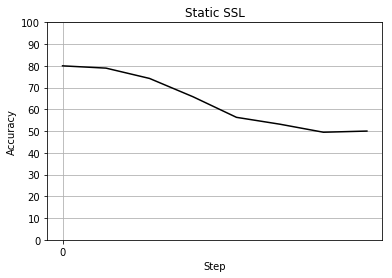

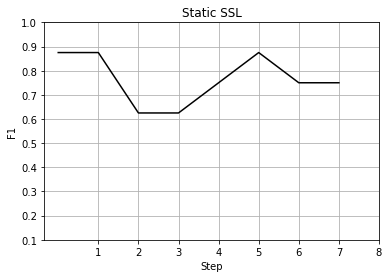




METHOD: Sliding lp as classifier
Execution time:  0.05446682998537877
Average micro-F1: 0.90625
Average Accuracy:  85.0
Standard Deviation:  2.21661340788
Variance:  4.913375


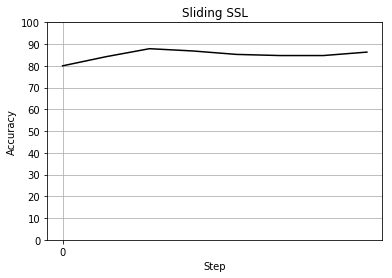

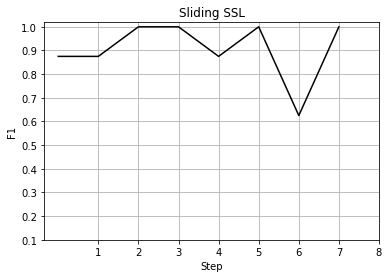




METHOD: Incremental lp as classifier
Execution time:  0.12589644550689838
Average micro-F1: 0.9375
Average Accuracy:  86.25
Standard Deviation:  3.39390630395
Variance:  11.5186


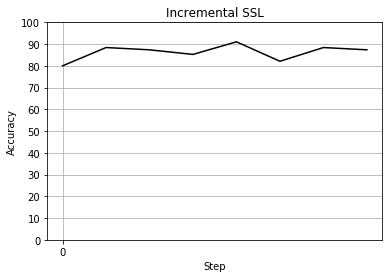

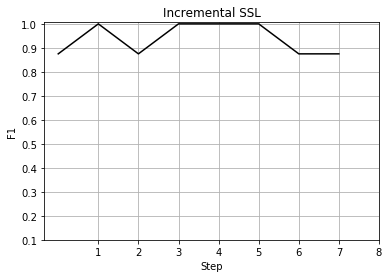




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  0.11416349332957232
Average micro-F1: 0.890625
Average Accuracy:  85.19625
Standard Deviation:  2.27019237896
Variance:  5.1537734375


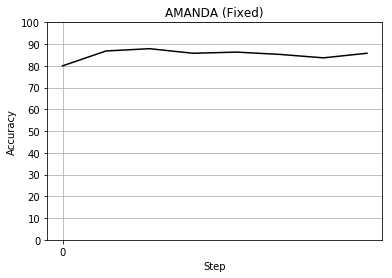

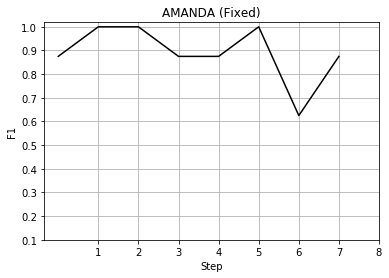




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
0 0.395097079216 0.156101702005 0.402649945876 0.292893218813
1 0.768641137747 0.590809198638 0.496213522963 0.292893218813
2 1.35049448356 1.82383535013 0.0860522644321 0.292893218813
3 1.63693964749 2.67957140951 0.364589159249 0.292893218813
4 0.704573365896 0.49642362793 0.499993581807 0.292893218813
5 1.14921500832 1.32069513534 0.304540315503 0.292893218813
6 1.70563614225 2.90919464975 0.497060884904 0.292893218813
7 0.427014417464 0.182341312722 0.421548267784 0.292893218813
Execution time:  1.7986083539061974
Average micro-F1: 0.9375
Average Accuracy:  87.5
Standard Deviation:  3.08817907512
Variance:  9.53685


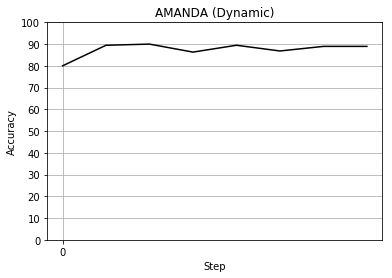

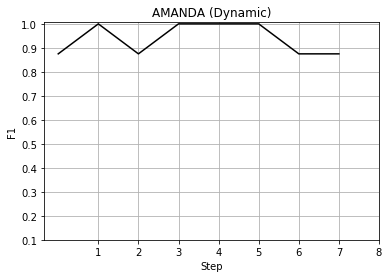




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  2.1081929183521013
Average micro-F1: 0.9375
Average Accuracy:  87.30375
Standard Deviation:  3.56477186332
Variance:  12.7075984375


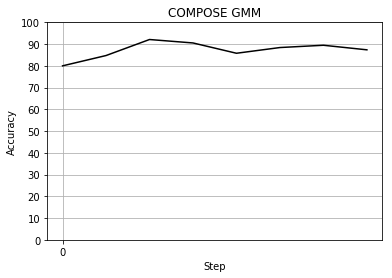

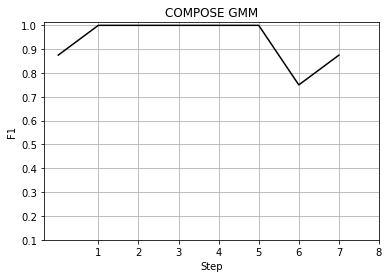




Method: Level IW
Execution time:  2.1081929183521013
Average F1:  0.21875
Average Accuracy:  87.0394875
Standard Deviation:  1.57756740699
Variance:  2.48871892359


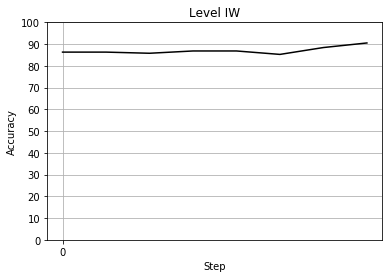

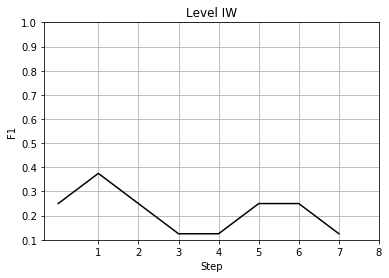

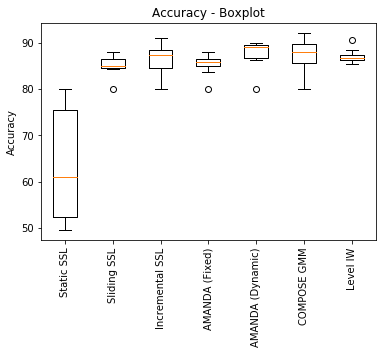

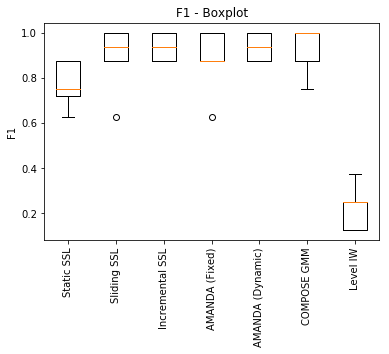

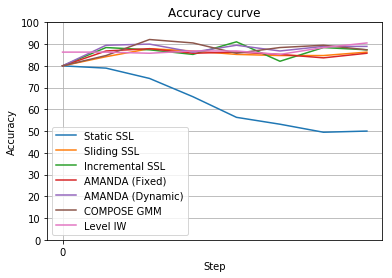

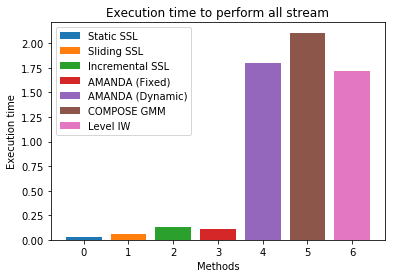

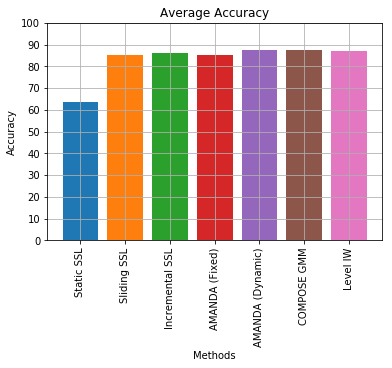

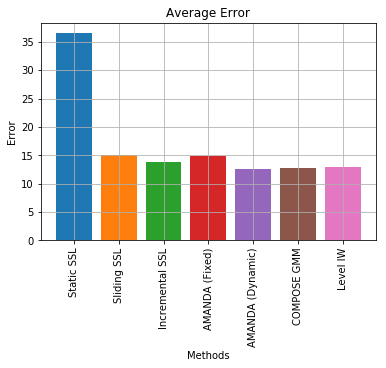

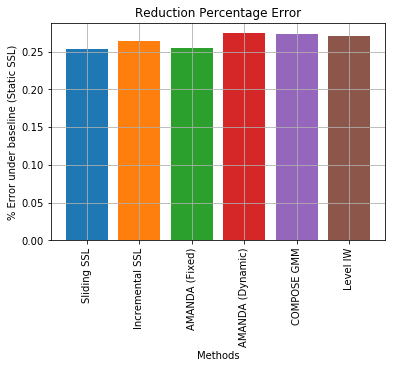

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, nb = naive bayes, knn = k-nn, sgd = stochastic gradient descent
    steps = 8
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadKeystroke(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 2, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 2, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 2, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 2, 0.7, "kde", clfName=sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 2, None, "kde", clfName=sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 2)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'keystroke', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()